Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import cv2

Load the pre-trained model (VGG16)

In [ ]:
model = VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Function to load and preprocess an image

In [ ]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img, img_array

Define occlusion parameters

In [ ]:
patch_size = 32  # Size of occlusion patch
stride = 16  # Step size for sliding occlusion

Function to perform occlusion analysis

The color intensity represents importance:

    Red areas → High sensitivity (important for classification).

    Blue areas → Low sensitivity (less important).

314509/314509 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━

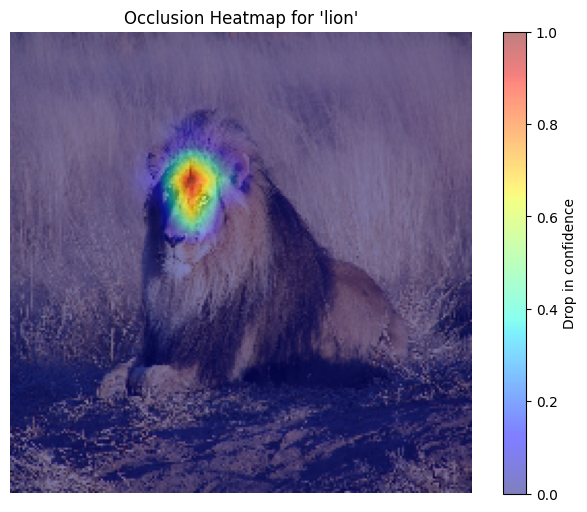

In [ ]:
def occlusion_experiment(img_path):
    orig_img, img_array = load_and_preprocess_image(img_path)

    # Get model's original prediction
    preds = model.predict(img_array)
    top_class = np.argmax(preds)  # Get class with highest probability
    class_name = decode_predictions(preds, top=1)[0][0][1]  # Decode class name

    # Get image dimensions
    img_height, img_width = 224, 224
    heatmap = np.zeros((img_height // stride, img_width // stride))

    # Perform occlusion
    for i, y in enumerate(range(0, img_height, stride)):
        for j, x in enumerate(range(0, img_width, stride)):
            occluded_img = img_array.copy()
            occluded_img[:, y:y+patch_size, x:x+patch_size, :] = 0  # Blackout patch

            # Predict on occluded image
            occluded_preds = model.predict(occluded_img)
            heatmap[i, j] = preds[0, top_class] - occluded_preds[0, top_class]  # Drop in confidence

    # Resize heatmap to image size
    heatmap_resized = cv2.resize(heatmap, (img_width, img_height))

    # Normalize heatmap
    heatmap_resized = (heatmap_resized - np.min(heatmap_resized)) / (np.max(heatmap_resized) - np.min(heatmap_resized))

    # Overlay heatmap on original image
    plt.figure(figsize=(8, 6))
    plt.imshow(orig_img)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.title(f"Occlusion Heatmap for '{class_name}'")
    plt.axis("off")
    plt.colorbar(label="Drop in confidence")
    plt.show()

# Run occlusion experiment on the lion image
lion_url = "https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg"
image_path = tf.keras.utils.get_file("lion.jpg", lion_url)
occlusion_experiment(image_path)

Summary of the Code: Occlusion Sensitivity Analysis for CNNs

    This code implements Occlusion Sensitivity Analysis using a pre-trained VGG16 model to visualize which regions of an image are most important for classification.
    
    It systematically blocks out small patches of an image and measures the drop in classification confidence, creating a heatmap to highlight critical areas.

